# Graphs - Traversal and Path Finding

In [49]:
!pip install networkx # install once

Requirement already satisfied: network in /Users/name/miniconda3.6/site-packages (2.3)

Requirement already satisfied: decoder>4.3.0 in /Users/nam/miniconda3/lib/python3.6/site-packages (from networkx) (4.3.0)

In [50]:
import networkx as nx
import matplotlib.pyplot as plt

# for notebook 
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

In [51]:
def draw_graph_with_nx(G): 
    pos = nx.spring_layout(G, iterations=200)
    options = {'node_color': 'white', 'alpha': 1, 'node_size': 2000, 'width': 0.002, 'font_color': 'darkred', 
               'font_size': 25, 'arrows': True, 'edge_color': 'brown',
               'arrowstyle': 'Fancy, head_length=1, head_width=1, tail_width=.4'
              }
    labels = nx.get_node_attributes(G, 'label')
    nx.draw(G, pos, labels=labels,  **options)
    plt.show()

In [52]:
class DiGraph: 
    def __init__(self): 
        self.g = {} 
        
    def add_node(self, node): 
        if node in self.g: 
            raise ValueError("Node already in graph")
            
        self.g[node] = [] 

    def add_edge(self, src, dest): 
        # sanity checks 
        if src not in self.g: 
            raise ValueError("Source node not in graph")
        if dest not in self.g: 
            raise ValueError("Destination node not in graph")
            
        nexts = self.g[src]
        if dest in nexts: 
            return 
        
        nexts.append(dest)
        
        
    def draw_graph(self): 
        G = nx.DiGraph()
        for src in self.g: 
            G.add_node(src, label=src) 
            for dest in self.g[src]:
                G.add_edge(src, dest)
                
        draw_graph_with_nx(G)     

In [53]:
g = DiGraph() 

nodes = ['a', 'b', 'c', 'd', 'e', 'f'] 

for n in nodes: 
    g.add_node(n) 

In [54]:
edges = [
    ('a', 'b'),
    ('a', 'c'),
    ('b', 'c'),
    ('b', 'd'),
    ('c', 'd'),
    ('d', 'c'),
    ('e', 'f'),
    ('f', 'c')
]

for e in edges:
    g.add_edge(e[0], e[1])

In [55]:
print(g.g) # Abstraction police: Don't freak out! We're just looking.

{'a': ['b', 'c'], 'b': ['c', 'd'], 'c': ['d'], 'd': ['c'], 'e': ['f'], 'f': ['c']}


In [56]:
import pprint  # pretty printing!
pprint.pprint(g.g)

{'a': ['b', 'c'],
 'b': ['c', 'd'],
 'c': ['d'],
 'd': ['c'],
 'e': ['f'],
 'f': ['c']}


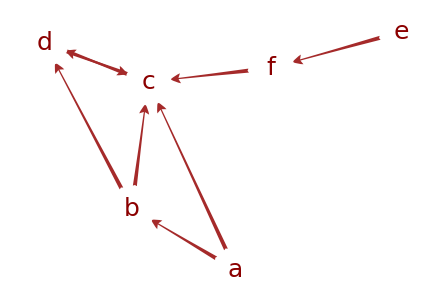

In [57]:
g.draw_graph()

In [58]:
def traverse_graph(self, start):
    """Traverse graph starting from given start node."""
    
    q = [start]
    visited = []
    
    while q:
        current = q.pop(0)
        
        # if we've already visited it, we can skip.
        if current in visited:
            continue
        
        print(current)
        
        #we're done with current
        visited.append(current)
        
        # get all directly connected nodes
        next_nodes = self.g[current]
        
        # travers all the nexts
        for n in next_nodes:
            q.append(n)

DiGraph.traverse_graph = traverse_graph

In [59]:
g.traverse_graph('a') # also traverse from e

a
b
c
d


In [60]:
def find_path(self, start, end, path=[]):
    """Find path (not necessarily shortest) from start to end."""
    # sanity check
    if start not in self.g:
        raise ValueError("Source node not in graph")
    
    print(start, ",", end)
    
    # save the path we have traversed til now
    path = path + [start] # path.append(start)
    
    # base case
    if start == end:
        return path
    
    # recursive case
    for node in self.g[start]:
        
        # need to avoid cycles
        if node not in path:
            
            # find path from next node to
            new_path = self.find_path(node, end, path)
            if new_path:
                return new_path
            
    # if no path can be found any of the next nodes to the end, there's no path!
    return None

DiGraph.find_path = find_path

In [61]:
g.find_path('d', 'd')

d , d


['d']

In [62]:
g.find_path('a', 'a')

a , a


['a']

In [63]:
g.find_path('a', 'c')

a , c
b , c
c , c


['a', 'b', 'c']

In [64]:
g.find_path('a', 'd')

a , d
b , d
c , d
d , d


['a', 'b', 'c', 'd']

In [65]:
print( g.find_path('a', 'f'))

a , f
b , f
c , f
d , f
d , f
c , f
c , f
d , f
None


Find All Paths Instead

In [66]:
def find_all_paths(self, start, end, path=[]):
    """Find path (not necessarily shortest) from start to end."""
    
    # sanity check
    if start not in self.g:
        raise ValueError("Source node not in graph")
        
    # save the path we have traversed till now
    path = path + [start]
    
    # base case
    if start == end:
        return [path]  # return the path in a list since we may have many
    
    all_paths = []  # changed
    
    # recursive call 
    for node in self.g[start]:
        
        # need to avoid cycles
        if node not in path:
            
            # find path from next node to
            all_newpaths = self.find_all_paths(node, end, path)
            for newpath in all_newpaths:
                all_paths.append(newpath)
                
    
    # if no path can be found from any of the next node to the end, there's no path!
    return all_paths

DiGraph.find_all_paths = find_all_paths

In [67]:
g.find_all_paths('a', 'd')

[['a', 'b', 'c', 'd'], ['a', 'b', 'd'], ['a', 'c', 'd']]

Shortest Path

In [70]:
def find_shortest_path(self, start, end, path = []):
    """Find path (not necessarily shortest ) from star to end"""
    
    # sanity check
    if start not in self.g:
        raise ValueError("source node not in graph.")
    
    # save the path we have traversed till now
    path = path +[start]
    
    # base case
    if start == end:
        return path
        
    shortest = None # changed
    
    # recursive case
    for node in self.g[start]:
        
        # need avoid cycles
        if node not in path:
            # find path from the next to
            newpath = self.find_shortest_path(node, end, path)
            if newpath:
                if shortest is None or len(newpath) < len(shortest):   # changed
                    shortest = newpath
                    
    # if no path can be found from any of the next nodes to the end , there's no path!
    return shortest
DiGraph.find_shortest_path = find_shortest_path

In [71]:
g.find_shortest_path('a', 'd')

['a', 'b', 'd']

In [73]:
g.find_path('a', 'd')

a , d
b , d
c , d
d , d


['a', 'b', 'c', 'd']